# ResOpsPT: HDMS data
***

**_Autor:_** Chus Casado Rodríguez<br>
**_Fecha:_** 03-04-2025<br>

**Introduction:**<br>
This code downloads the Portuguese reservoirs and time series available in the Hydrological Data Management Service (HDMS). The result is a point shapefile of stations, and, for each station, a CSV file with the historic daily time series.

In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pandas as pd
import xarray as xr
from datetime import datetime
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from efashydro.stations import get_stations, find_duplicates
from efashydro.timeseries import get_timeseries
from lisfloodreservoirs.utils import DatasetConfig, APIConfig

## Configuration

In [27]:
# station filters
TYPE = 'reservoir'
COUNTRY_ID = 'PT'
PROVIDER_ID = None

# time series filters
service = 'nhoperational24hw'
variables = ['I', 'O', 'V', 'R']

# dataset cofiguration
cfg = DatasetConfig(f'./config_dataset.yml')

# HDMS API configuration
api = APIConfig('../hDMS/HDMS_API.yml')

## Stations

In [5]:
stations = get_stations(
    api.USERNAME,
    api.PASSWORD,
    kind=TYPE,
    country_id=COUNTRY_ID,
    provider_id=PROVIDER_ID,
)
print(f'Metadata for {len(stations)} stations were extracted')

Metadata for 20 stations were extracted


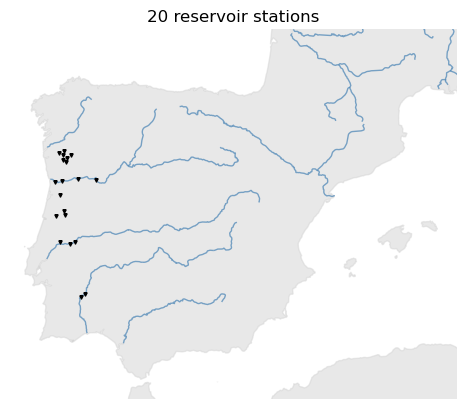

In [11]:
# plot stations
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='lightgray'),
               alpha=.5,
               zorder=0)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m', edgecolor='steelblue', facecolor='none'),
               linewidth=1, alpha=0.7, zorder=1)
stations.plot(markersize=5, c='k', marker='v', ax=ax)
ax.set_title(f'{len(stations)} {TYPE} stations')
ax.set_extent([-10, 5, 35.5, 45])
ax.axis('off');

In [15]:
# export
PATH_GIS = cfg.PATH_RESOPS / 'GIS'
PATH_GIS.mkdir(parents=True, exist_ok=True)
if PROVIDER_ID:
    shp_file = PATH_GIS / '{0}_HDMS_{1}_{2}.shp'.format(TYPE, PROVIDER_ID, datetime.now().strftime('%Y%m%d'))
elif COUNTRY_ID:
    shp_file = PATH_GIS / '{0}_HDMS_{1}_{2}.shp'.format(TYPE, COUNTRY_ID, datetime.now().strftime('%Y%m%d'))
else:
    shp_file = PATH_GIS / '{0}_HDMS_{1}.shp'.format(TYPE, datetime.now().strftime('%Y%m%d'))
stations.to_file(shp_file)
print(f'Shapefile of stations saved in {shp_file}')

Shapefile of stations saved in Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\GIS\reservoir_HDMS_PT_20250403.shp


**Duplicated by distance and provider**

In [25]:
# find duplicates based on distance and provider
duplicates = find_duplicates(
    stations.to_crs(epsg=25829), # project to UTM-29N to measure distance in m
    provider_col='PROV_ID', 
    distance_thr=1500 # m
)
print(f'{len(duplicates)} duplicates were found')

# export
if len(duplicates) > 0:
    with open(f"duplicated_{TYPE}.txt", "w") as file:
        for sublist in duplicates:
            file.write(','.join(map(str, sublist)) + '\n')

0 duplicates were found


## Timeseries

In [38]:
for efas_id in tqdm(stations.index, desc='stations'):
    try:
        # extract time series
        ts = get_timeseries(
            api.USERNAME,
            api.PASSWORD, 
            station_id=efas_id, 
            service=service, 
            variable=variables, 
            start=cfg.START, 
            end=cfg.END,
        )

        # save them as CSV
        out_file = cfg.PATH_OBS_TS / f'{efas_id}.csv'
        ts.to_csv(out_file)
        print(f'File saved: {out_file}')
    except Exception as e:
        print(f'Time series for station {efas_id} could not be extracted/saved:\n {e}')
        

stations:   0%|          | 0/20 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10341.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10342.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10343.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10344.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10345.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10346.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10347.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10348.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10349.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10350.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10351.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10352.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10353.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10354.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10355.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10356.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10357.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10358.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10359.csv


Variables:   0%|          | 0/4 [00:00<?, ?it/s]

File saved: Z:\nahaUsers\casadje\datasets\reservoirs\ResOpsPT\raw\time_series\10360.csv
